<table>
    <tr>
      <td>Introducción a
      </td>
      <td>
      <img src="https://media.licdn.com/dms/image/D5612AQF7GSp3l4pztQ/article-cover_image-shrink_720_1280/0/1686548640655?e=1715817600&v=beta&t=WQzv1EMkEEwZ0QZ0PF1anRKIHCl5BBH_YPZHdDQsWPM"  width=150/>
      </td>
     </tr>
</table>
Rafa Caballero




# Outliers - Boxplots



### Índice
[Intro](#Introducción)<br>
[Ejemplo](#Ejemplo)<br>
[Visualizando outliers](#Visualizando)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[Histogramas](#Histogramas)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[Boxplots](#Boxplots)<br>
[Métodos numéricos](#Numéricos)<br>
[Outliers en varias dimensiones](#Multivariante)<br>
[Bibliografía](#Bibliografía)<br>


<a name="Intro"></a>
## Introducción
¿Qué es un outlier? Una posible definición sería

*un valor que se desvía tanto del resto que lleva a sospechar que se ha producido a través de un mecanismo diferente*

Ese mecanismo diferente puede ser un error en la toma de datos o una circunstancia especial.

Al considerar outliers no debemos utilizar la media y la desviación típica, porque son valores que se ven muy afectados por los propios outliers. En su lugar utilizaremos medidas más *robustas* como la mediana. Hay multitud de métodos dado que se trata de un problema recurrente y fundamental. Aquí vamos a ver dos tipos de métodos:

* Visuales
* Estadísticos

Para más detalles ver la [bibliografía](#Bibliografía)

<a name="Ejemplo"></a>
## Ejemplo

Como ejemplo vamos a ver las estadísticas de varios pilotos de Fórmula 1 en el gran premio de Arabia Saudita en marzo de 2023.

Estos datos nos los proporciona la siguiente librería


In [ ]:
!pip install --user --upgrade numpy

In [ ]:
!pip install --user --upgrade scipy

     --------------------------------------- 42.5/42.5 MB 28.5 MB/s eta 0:00:00


In [ ]:
!pip install --user --upgrade fastf1

Aquí se preparan los datos, que incluyen el tiempo por vuelta y el tiempo en cada sector para algunos pilotos

In [ ]:
import fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

fastf1.Cache.enable_cache('.')

race = fastf1.get_session(2023, 'Jeddah', 'R')
race.load()

short = ["PER","VER","ALO","RUS"]
delta_cols = ["LapTime","Sector1Time","Sector2Time","Sector3Time"]
drivers = []
for s in short:
    df = race.laps.pick_driver(s)
    df.loc[:,"Driver"] = s
    df = df.drop(columns=["DriverNumber", "Time","PitOutTime", "Sector1SessionTime","Sector2SessionTime",
                          "Sector3SessionTime","SpeedI1","SpeedI2","SpeedFL",
                        "IsPersonalBest","LapStartTime","FreshTyre","Stint","LapStartDate","TrackStatus","IsAccurate"])
    df["PitInTime"] = pd.to_timedelta(df["PitInTime"])
    df.loc[df["PitInTime"].isna(),"PitInTime"] = 0
    for c in delta_cols:
        df[c] = df[c].astype('timedelta64[ms]').astype(pd.Int64Dtype())/1000.0
    drivers.append(df)

f1 = pd.concat(drivers,axis=0).dropna()
f1.to_csv("f1-Jeddah23.csv", index=False)
f1

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.3.1]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tra

,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Driver
1,95.906,2,0,35.785,29.903,30.218,316.0,MEDIUM,2.0,Red Bull Racing,PER
2,94.829,3,0,35.34,29.825,29.664,334.0,MEDIUM,3.0,Red Bull Racing,PER
3,95.651,4,0,35.484,30.147,30.02,307.0,MEDIUM,4.0,Red Bull Racing,PER
4,94.873,5,0,35.024,29.903,29.946,312.0,MEDIUM,5.0,Red Bull Racing,PER
5,94.621,6,0,34.934,29.815,29.872,310.0,MEDIUM,6.0,Red Bull Racing,PER
...,...,...,...,...,...,...,...,...,...,...,...
195,92.982,46,0,34.188,29.299,29.495,303.0,HARD,28.0,Mercedes,RUS
196,92.901,47,0,34.167,29.235,29.499,306.0,HARD,29.0,Mercedes,RUS
197,92.756,48,0,33.841,29.174,29.741,299.0,HARD,30.0,Mercedes,RUS
198,93.135,49,0,34.245,29.248,29.642,305.0,HARD,31.0,Mercedes,RUS


In [ ]:
# usar esta dirección si se quiere leer los datos directamente
# url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/f1-Jeddah23.csv"

In [ ]:
f1.info()

<class 'fastf1.core.Laps'>
Int64Index: 187 entries, 1 to 199
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LapTime      187 non-null    Float64
 1   LapNumber    187 non-null    int64  
 2   PitInTime    187 non-null    object 
 3   Sector1Time  187 non-null    Float64
 4   Sector2Time  187 non-null    Float64
 5   Sector3Time  187 non-null    Float64
 6   SpeedST      187 non-null    float64
 7   Compound     187 non-null    object 
 8   TyreLife     187 non-null    float64
 9   Team         187 non-null    object 
 10  Driver       187 non-null    object 
dtypes: Float64(4), float64(2), int64(1), object(4)
memory usage: 18.3+ KB


In [ ]:
f1.describe()

,LapTime,LapNumber,Sector1Time,Sector2Time,Sector3Time,SpeedST,TyreLife
count,187.0,187.000000,187.0,187.0,187.0,187.000000,187.000000
mean,94.702412,26.256684,34.782487,29.847299,30.072626,306.385027,14.962567
std,5.50129,14.448961,1.452949,2.098748,2.18043,15.320286,8.437862
min,91.906,2.000000,33.543,29.029,29.244,186.000000,2.000000
25%,92.954,13.000000,34.1715,29.2665,29.503,301.000000,8.000000
50%,93.758,27.000000,34.486,29.514,29.754,309.000000,14.000000
75%,94.8825,39.000000,34.9935,29.81,30.006,313.000000,21.000000
max,134.348,50.000000,48.991,47.443,46.114,342.000000,33.000000


<a name="Visualizando"></a>
## Visualizando outliers


<a name="Histogramas"></a>
### Histogramas

Un primero método consiste en visualizar el histograma de la variable y observar si algún intervalo o `bin` está muy alejado o tiene una cantidad pequeña de valores:

<AxesSubplot: >

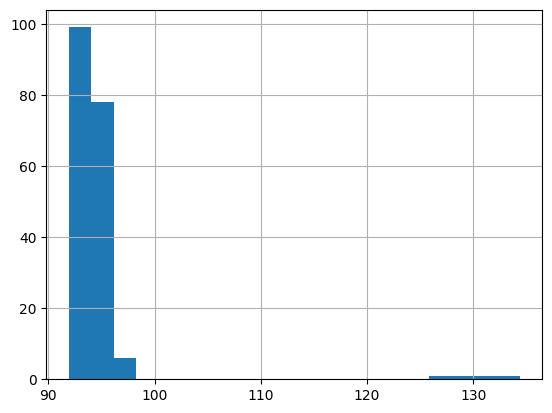

In [ ]:
f1["LapTime"].hist(bins=20)

Parece que algunos bins aparecen muy a la derecha, son tiempos por vuelta inusualmente altos.

Si nos concentramos solo en esta columna y la del nombre del piloto podemos ver si sucede para cada piloto

In [ ]:
df_vueltas = f1[["LapNumber","LapTime","Driver"]]
df_vueltas

,LapNumber,LapTime,Driver
1,2,95.906,PER
2,3,94.829,PER
3,4,95.651,PER
4,5,94.873,PER
5,6,94.621,PER
...,...,...,...
195,46,92.982,RUS
196,47,92.901,RUS
197,48,92.756,RUS
198,49,93.135,RUS


Podríamos obtener el nombre de cada piloto, con un bucle hacer un filtro para ese piloto y entonces el histograma...muy lioso y lento ¿Qué operación podemos usar para que cada piloto sea una columna con sus tiempos por vuelta?

Parece que un criterio sería encontrar bins con muy pocos valores, quizás tras varios "bins" vacíos. Para conocer el número de elementos en cada bin usaremos la función hist de plt, que nos devuelve estas frecuencias `n`,

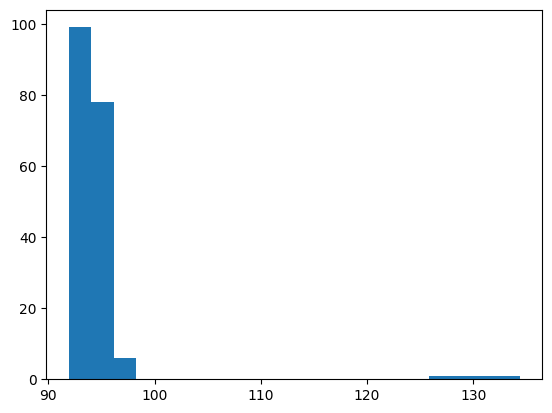

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(n, bins, patches)  = plt.hist(f1["LapTime"],bins=20)

In [ ]:
n, len(n)

(array([99., 78.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  1.,  1.]),
 20)

In [ ]:
bins, len(bins)

(array([ 91.906 ,  94.0281,  96.1502,  98.2723, 100.3944, 102.5165,
        104.6386, 106.7607, 108.8828, 111.0049, 113.127 , 115.2491,
        117.3712, 119.4933, 121.6154, 123.7375, 125.8596, 127.9817,
        130.1038, 132.2259, 134.348 ]),
 21)

Parece por tanto que a partir de 125.8596, hay outliers, vamos a ver estos valores

In [ ]:
limite = 125.8596
filtro = f1["LapTime"] > limite
f1[filtro]

,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Driver
17,127.357,18,0 days 01:31:46.882000,39.183,47.443,40.731,282.0,MEDIUM,18.0,Red Bull Racing,PER
67,134.348,18,0 days 01:32:15.366000,48.991,40.059,45.298,197.0,MEDIUM,18.0,Red Bull Racing,VER
117,129.623,18,0 days 01:31:55.100000,39.863,43.937,45.823,186.0,MEDIUM,18.0,Aston Martin,ALO
167,132.217,18,0 days 01:32:05.756000,43.181,42.922,46.114,241.0,MEDIUM,18.0,Mercedes,RUS


In [ ]:
f1[~filtro]

,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Driver
1,95.906,2,0,35.785,29.903,30.218,316.0,MEDIUM,2.0,Red Bull Racing,PER
2,94.829,3,0,35.34,29.825,29.664,334.0,MEDIUM,3.0,Red Bull Racing,PER
3,95.651,4,0,35.484,30.147,30.02,307.0,MEDIUM,4.0,Red Bull Racing,PER
4,94.873,5,0,35.024,29.903,29.946,312.0,MEDIUM,5.0,Red Bull Racing,PER
5,94.621,6,0,34.934,29.815,29.872,310.0,MEDIUM,6.0,Red Bull Racing,PER
...,...,...,...,...,...,...,...,...,...,...,...
195,92.982,46,0,34.188,29.299,29.495,303.0,HARD,28.0,Mercedes,RUS
196,92.901,47,0,34.167,29.235,29.499,306.0,HARD,29.0,Mercedes,RUS
197,92.756,48,0,33.841,29.174,29.741,299.0,HARD,30.0,Mercedes,RUS
198,93.135,49,0,34.245,29.248,29.642,305.0,HARD,31.0,Mercedes,RUS


Parece mostrarnos que los outliers coinciden justo con cuando PitInTime !=0, que es cuando han entrado a cambiar neumáticos

In [ ]:
f1[f1.PitInTime!=0]

,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Driver
17,127.357,18,0 days 01:31:46.882000,39.183,47.443,40.731,282.0,MEDIUM,18.0,Red Bull Racing,PER
67,134.348,18,0 days 01:32:15.366000,48.991,40.059,45.298,197.0,MEDIUM,18.0,Red Bull Racing,VER
117,129.623,18,0 days 01:31:55.100000,39.863,43.937,45.823,186.0,MEDIUM,18.0,Aston Martin,ALO
167,132.217,18,0 days 01:32:05.756000,43.181,42.922,46.114,241.0,MEDIUM,18.0,Mercedes,RUS


Veamos los histogramas sin  outliers

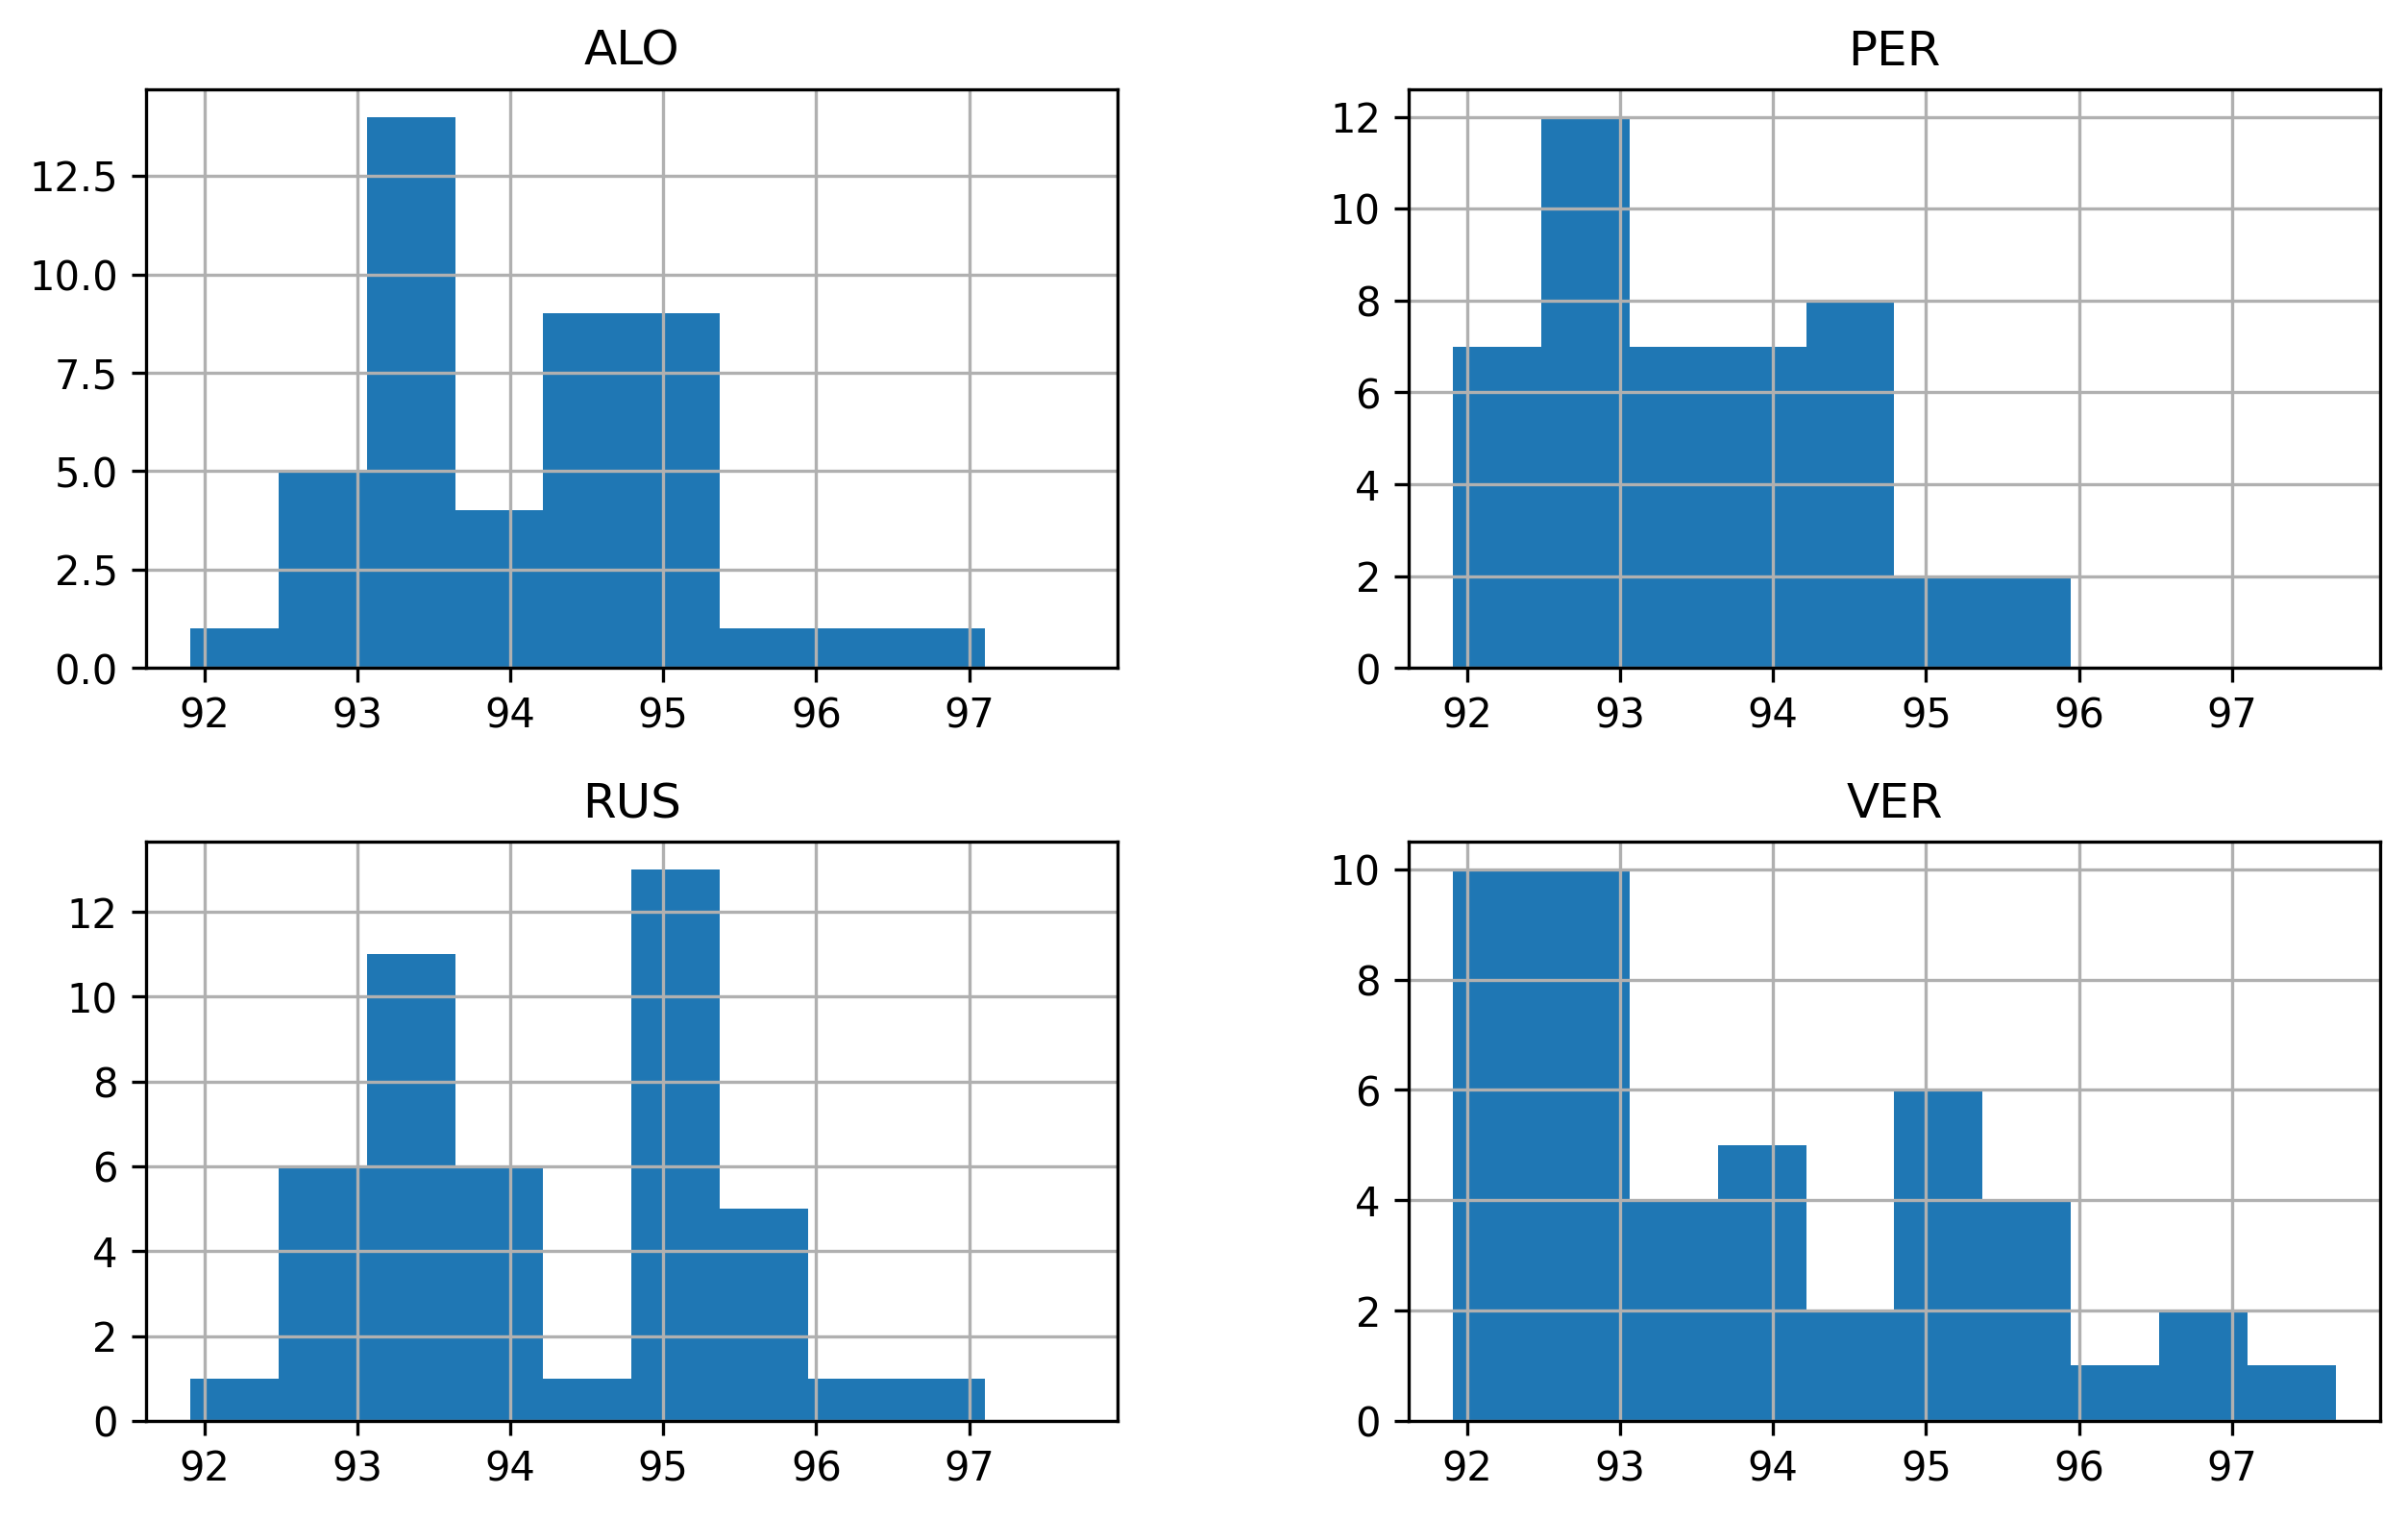

In [ ]:

df_vueltas = f1.loc[~filtro,["LapNumber","LapTime","Driver"]]
fig, ax = plt.subplots(2,2,figsize=(10, 6),dpi=300)

df_pilotos = df_vueltas.pivot(index="LapNumber", columns="Driver", values="LapTime").dropna()
df_pilotos.hist(ax=ax, range=[df_vueltas.LapTime.min() , df_vueltas.LapTime.max()])
plt.show()

Sabiendo que el número de filas es aproximadamente el mismo ¿cuál se parece más a una normal atendiendo al estadístico? ¿y a p?

In [ ]:
from scipy.stats import normaltest

for driver in df_vueltas.Driver.unique():
    print(driver)
    k2, p = normaltest(np.array(df_pilotos[driver],dtype='f'))
    print(f"{driver}: estadístico {round(k2,4)}, p {round(p,4)}")

PER
PER: estadístico 2.8403, p 0.2417
VER
VER: estadístico 4.5581, p 0.1024
ALO
ALO: estadístico 1.3949, p 0.4979
RUS
RUS: estadístico 5.4281, p 0.0663


Asimetría y Curtosis en cada caso


In [ ]:
from scipy.stats import skew,skewtest,kurtosis,kurtosistest

for driver in df_vueltas.Driver.unique():
    print(driver)
    x = np.array(df_pilotos[driver],dtype='f')
    e_s,p_s  = skewtest(x)
    e_k,p_k  = kurtosistest(x)
    if p_s>0.05:
        print("No podemos rechazar que no tenga asimetría")
    else:
        print("Asimetría ", "positiva" if skew(x)>0 else "negativa")
    if p_k>0.05:
        print("No podemos rechazar que curtosis==0")
    else:
        print("Curtosis ", "leptocúrtica" if kurtosis(x)>0 else "mesocúrtica")
    print("="*60)

PER
No podemos rechazar que no tenga asimetría
No podemos rechazar que curtosis==0
VER
Asimetría  positiva
No podemos rechazar que curtosis==0
ALO
No podemos rechazar que no tenga asimetría
No podemos rechazar que curtosis==0
RUS
No podemos rechazar que no tenga asimetría
Curtosis  mesocúrtica


¿Qué sígnifica que RUS tenga histograma "mesocúrtico"?

<a name="Boxplots"></a>
### Boxplots

Sin embargo hay otro método que se utiliza más a menudo porque además da más información: los boxplots (también llamados en castellano "diagramas de cajas y bigotes"). Están basados en la mediana y muestran la siguiente información:

<img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" width=600/>

El criterio para declarar algo como outlier es por tanto ser  $< Q_1 - 1.5 \times (Q_3- Q_1)$  o  bien $> Q_3 + 1.5 \times (Q_3- Q_1)$

Se trata de un criterio bastante exigente porque en el caso de una normal suma más del 99% de la población

<img src="https://miro.medium.com/max/8100/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width=600/>

En Python se pueden mostrar tanto con pandas, como con matplotlib como con seaborn.

Con matplotlib:

In [ ]:
f1.iloc[0,0]=80
f1

,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Driver
1,80.0,2,0,35.785,29.903,30.218,316.0,MEDIUM,2.0,Red Bull Racing,PER
2,94.829,3,0,35.34,29.825,29.664,334.0,MEDIUM,3.0,Red Bull Racing,PER
3,95.651,4,0,35.484,30.147,30.02,307.0,MEDIUM,4.0,Red Bull Racing,PER
4,94.873,5,0,35.024,29.903,29.946,312.0,MEDIUM,5.0,Red Bull Racing,PER
5,94.621,6,0,34.934,29.815,29.872,310.0,MEDIUM,6.0,Red Bull Racing,PER
...,...,...,...,...,...,...,...,...,...,...,...
195,92.982,46,0,34.188,29.299,29.495,303.0,HARD,28.0,Mercedes,RUS
196,92.901,47,0,34.167,29.235,29.499,306.0,HARD,29.0,Mercedes,RUS
197,92.756,48,0,33.841,29.174,29.741,299.0,HARD,30.0,Mercedes,RUS
198,93.135,49,0,34.245,29.248,29.642,305.0,HARD,31.0,Mercedes,RUS


<AxesSubplot: >

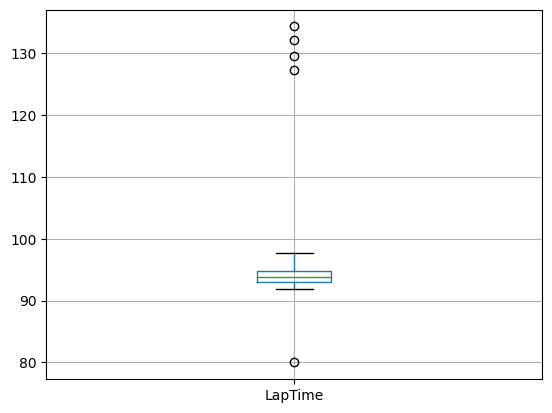

In [ ]:
f1.boxplot(column = "LapTime")

<AxesSubplot: title={'center': 'LapTime'}, xlabel='Driver'>

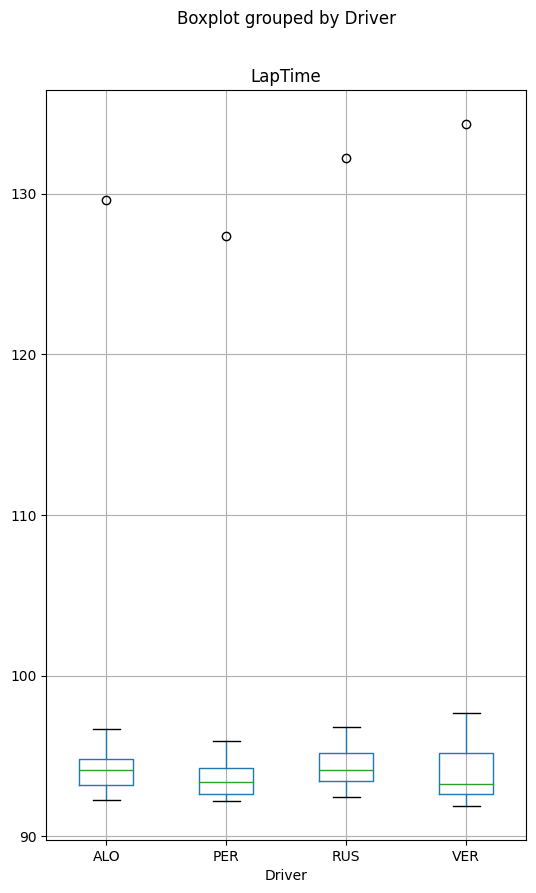

In [ ]:
fig, ax = plt.subplots(figsize=(6, 10),dpi=100)
f1.boxplot(column = "LapTime", by="Driver",ax=ax)

**matplotlib** Tiene la ventaja de poder incluir el "notch" que indica un intervalo de confianza para la mediana

{'whiskers': [<matplotlib.lines.Line2D at 0x23fff306550>,
 'caps': [<matplotlib.lines.Line2D at 0x23fff306a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x23fff3062b0>,
 'medians': [<matplotlib.lines.Line2D at 0x23fff306fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x23fff35e2b0>,
 'means': []}

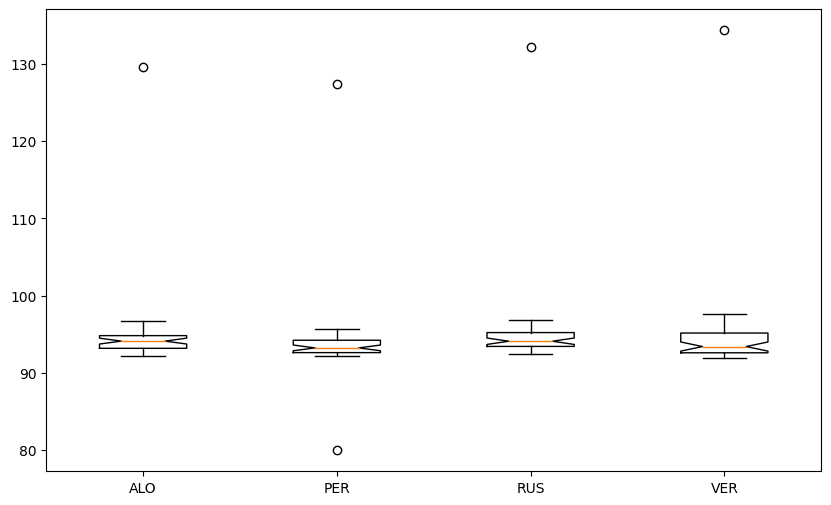

In [ ]:
df_vueltas = f1[["LapNumber","LapTime","Driver"]]

df_pilotos = df_vueltas.pivot(index="LapNumber", columns="Driver", values="LapTime")

fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
ax.boxplot(df_pilotos.dropna(),    notch = True,labels=df_pilotos.columns)


Un poco más bonito

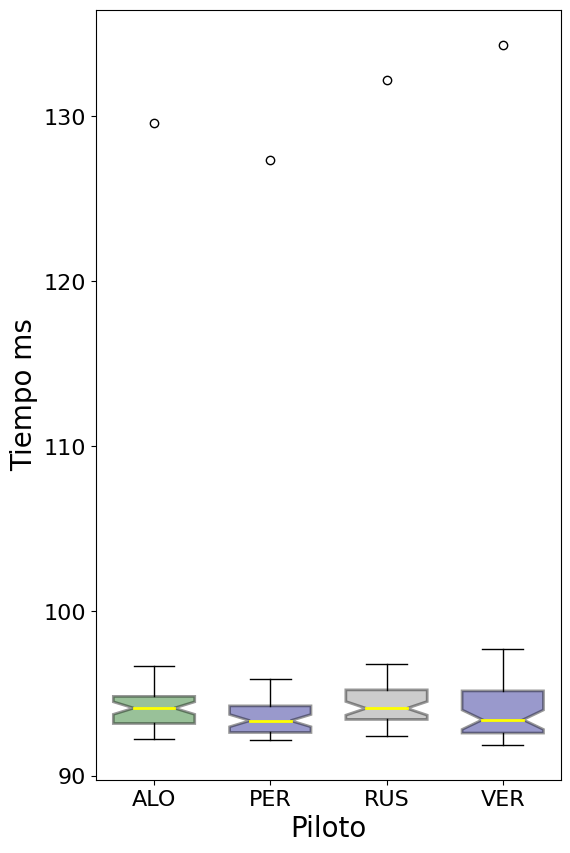

In [ ]:
fig, ax = plt.subplots(figsize=(6, 10),dpi=100)
boxplots = ax.boxplot(df_pilotos.dropna(), notch = True,labels=df_pilotos.columns,
             widths = .7,
             patch_artist=True,
             medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
             boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4))
# colores
boxplots['boxes'][0].set_facecolor('darkgreen')
boxplots['boxes'][1].set_facecolor('navy')
boxplots['boxes'][2].set_facecolor('grey')
boxplots['boxes'][3].set_facecolor('navy')

plt.ylabel('Tiempo ms', fontsize = 20)
plt.xlabel('Piloto', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

**Seaborn**

<AxesSubplot: xlabel='LapTime'>

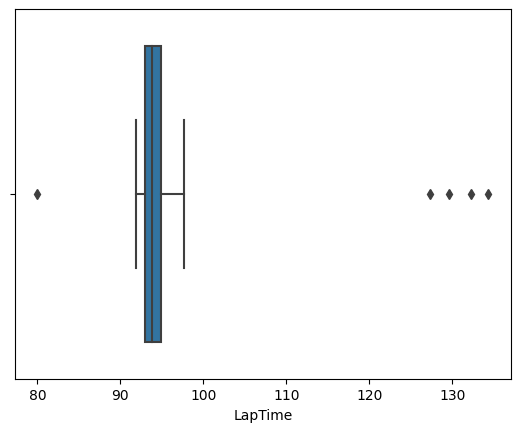

In [ ]:
import seaborn as sns
sns.boxplot(x=f1["LapTime"])

<AxesSubplot: xlabel='LapTime', ylabel='Driver'>

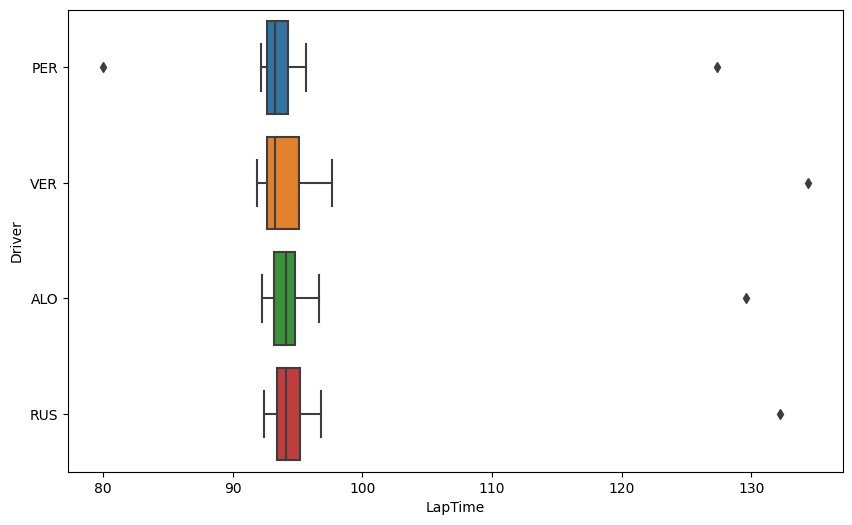

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
sns.boxplot(x=f1["LapTime"],y=f1["Driver"])

<AxesSubplot: xlabel='LapTime', ylabel='Compound'>

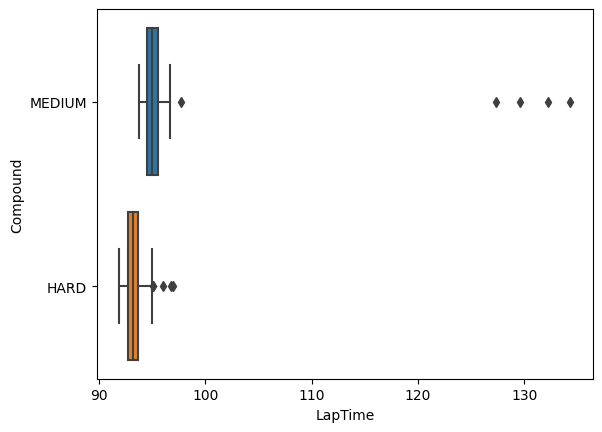

In [ ]:
sns.boxplot(x=f1["LapTime"],y=f1["Compound"])

In [ ]:
columns = ['Sector1Time', 'Sector2Time', 'Sector3Time', 'Driver',"LapNumber"]
df_sectores = pd.melt(f1[~filtro][columns], id_vars=['Driver','LapNumber'])
df_sectores

,Driver,LapNumber,variable,value
0,PER,2,Sector1Time,35.785
1,PER,3,Sector1Time,35.34
2,PER,4,Sector1Time,35.484
3,PER,5,Sector1Time,35.024
4,PER,6,Sector1Time,34.934
...,...,...,...,...
544,RUS,46,Sector3Time,29.495
545,RUS,47,Sector3Time,29.499
546,RUS,48,Sector3Time,29.741
547,RUS,49,Sector3Time,29.642


<AxesSubplot: xlabel='value', ylabel='Driver'>

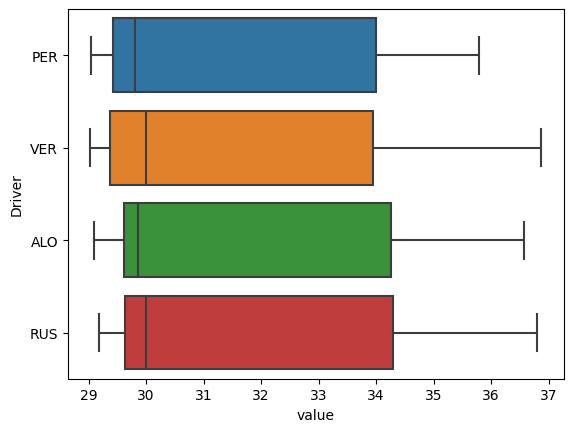

In [ ]:
sns.boxplot(data = df_sectores, x="value",y="Driver")

<AxesSubplot: xlabel='value', ylabel='variable'>

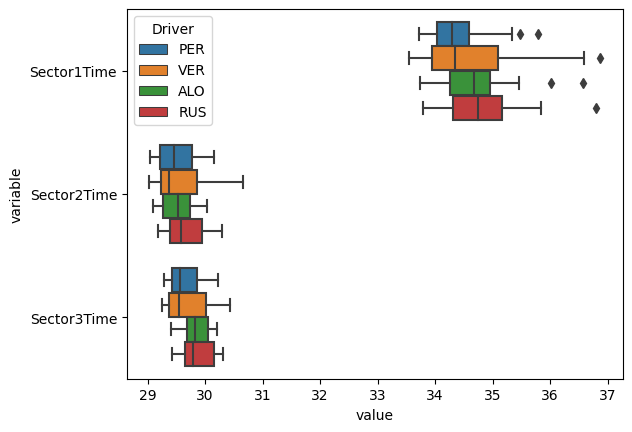

In [ ]:
sns.boxplot(data = df_sectores, x="value",y="variable",hue="Driver")

<a name="Numéricos"></a>
## Métodos numéricos

El primero ya lo hemos visto y es el que utilizan los boxplots; un valor x se considera outlier si

$x< Q_1 - 1.5 \times (Q_3- Q_1)$  o  bien $x> Q_3 + 1.5 \times (Q_3- Q_1)$

Solo nos falta poder calcular $Q_1, Q_3$, pero el método `quantile`de Pandas lo pone muy fácil. Vamos a obtener los outliers para cada piloto:

In [ ]:
df_vueltas = f1[["LapNumber","LapTime","Driver"]]

df_pilotos = df_vueltas.pivot(index="LapNumber", columns="Driver", values="LapTime")

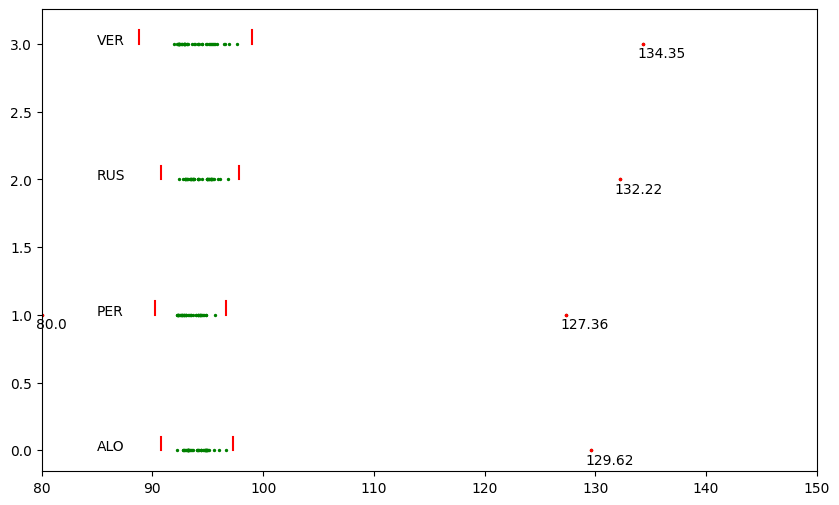

In [ ]:
def muestra(ax, x,inferior,superior,c):
    filtro_menor = x < inferior
    filtro_mayor = x > superior
    outliers = np.concatenate( (x[filtro_menor].values,x[filtro_mayor].values))

    # lo mostramos
    ax.scatter(x, [i]*len(x),color="green",s=2)

    # señalamos el límite inferior y superior
    ax.plot([inferior, inferior], [i,i+0.1],color="red")
    ax.plot([superior, superior], [i,i+0.1],color="red")


    # ahora cada outlier
    for o in outliers:
        ax.scatter([o],[i],color="red",s=2.5)
        plt.text(o-0.5,i-0.1,round(o,2))

    plt.text(85, i, c)
    return



fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
for i, driver in enumerate(df_pilotos.columns):
    x = df_pilotos[driver].dropna()
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    inferior = q1 - 1.5*(q3-q1)
    superior = q3 + 1.5*(q3-q1)
    muestra(ax,x,inferior,superior,driver)


ax.set_xlim([80,150])
#ax.set_ylim([-1,len(df_pilotos.columns)])
plt.show()


Otro método, el llamado *Hampel X84*  utiliza la mediana y el mad para indicar que los puntos que están separados más de $1.4826 \times \theta\times MAD$ de la mediana son puntos extremos, donde $\theta$ es un número (1,2,3,4) que elegimos nosotros. Por ejemplo para $\theta=3$:

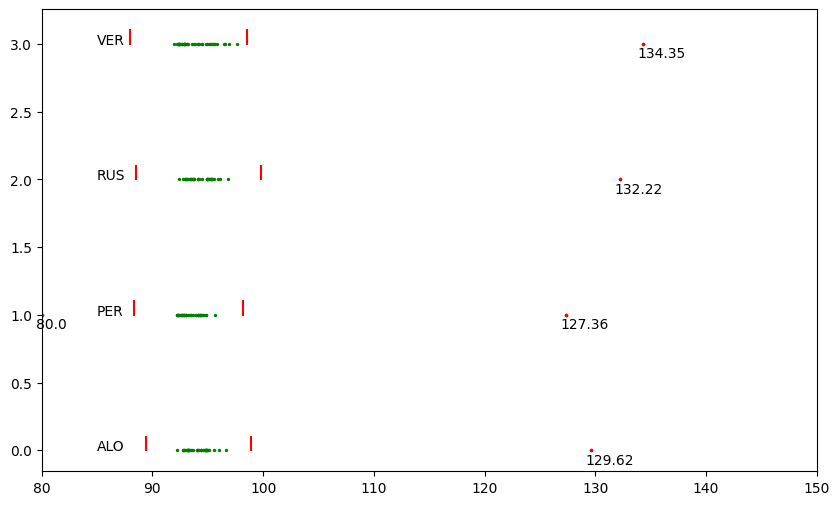

In [ ]:
from scipy.stats import median_abs_deviation

fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
for i, driver in enumerate(df_pilotos.columns):
    x = df_pilotos[driver].dropna()
    mediana = x.median()
    MAD = median_abs_deviation(x)
    theta = 4
    inferior = mediana -  1.4826*4*MAD
    superior = mediana + 1.4826*4*MAD

    muestra(ax,x,inferior,superior,driver)



ax.set_xlim([80,150])
#ax.set_ylim([-1,len(df_pilotos.columns)])
plt.show()

<a name="Multivariante"></a>
## Outliers en varias dimensiones

Consideramos el siguiente dataframe

In [ ]:
### Create the Data
d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]),
                               cov = np.array([[1, 0], [0, 1]]), size = 100)
d2 = np.random.multivariate_normal(mean = np.array([15, 10]),
                               cov = np.array([[1, 0.3], [.3, 1]]), size = 100)
outliers = np.array([[0, 10],[0, 9.5]])
df = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var1', 'Var2'])
df

,Var1,Var2
0,-0.461246,-1.840763
1,-0.805791,-0.967171
2,-0.081409,-0.470394
3,-1.060986,-0.596637
4,-0.858232,0.635539
...,...,...
197,14.917787,10.454471
198,14.696319,8.612987
199,15.375207,10.674702
200,0.000000,10.000000


usamos el método anterior



<AxesSubplot: >

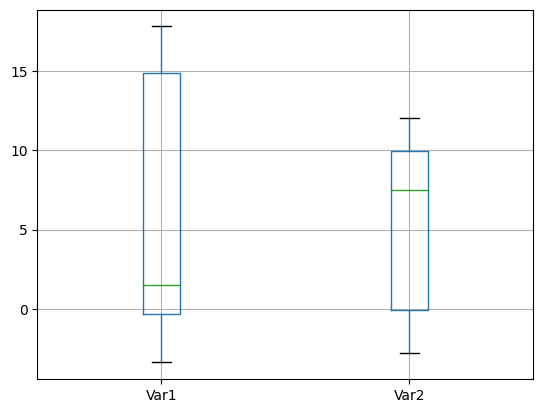

In [ ]:
df.boxplot()

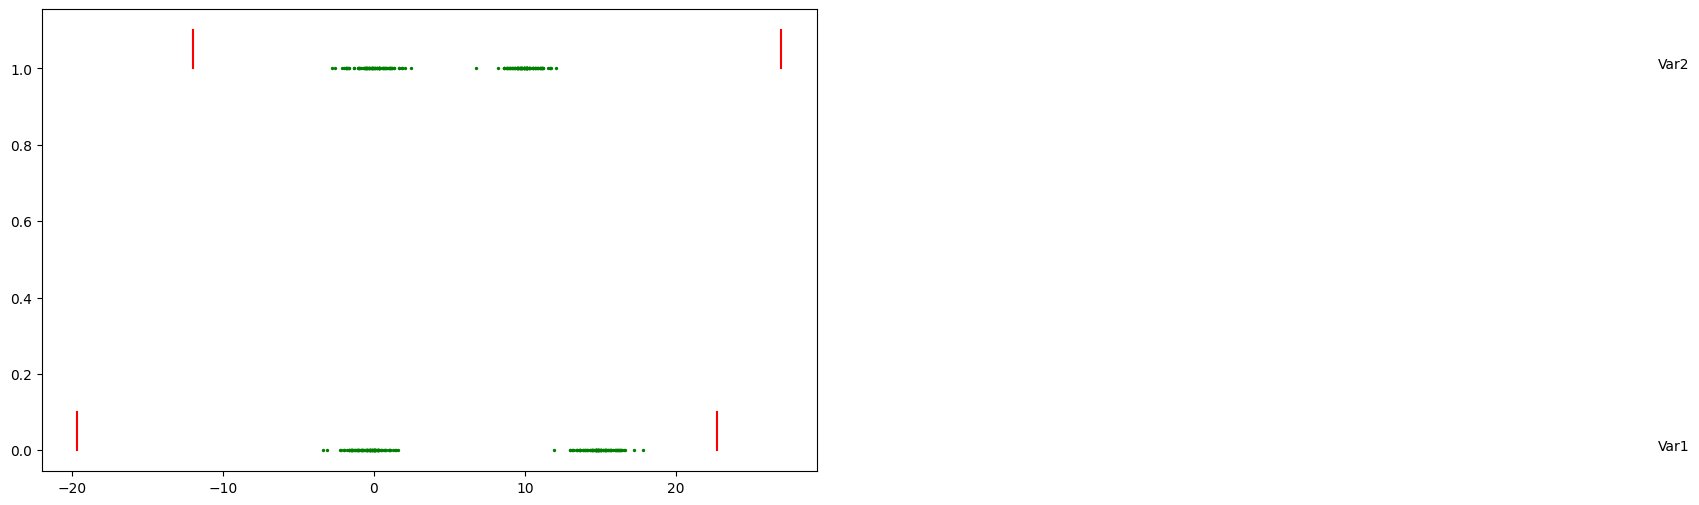

In [ ]:
from scipy.stats import median_abs_deviation

fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
for i, c in enumerate(df.columns):
    x = df[c].dropna()
    mediana = x.median()
    MAD = median_abs_deviation(x)
    inferior = mediana -  1.4826*3*MAD
    superior = mediana + 1.4826*3*MAD

    muestra(ax,x,inferior,superior,c)



#ax.set_ylim([-1,len(df_pilotos.columns)])
plt.show()

In [ ]:
¡No hay ouliers! Seguro?

Object `Seguro` not found.


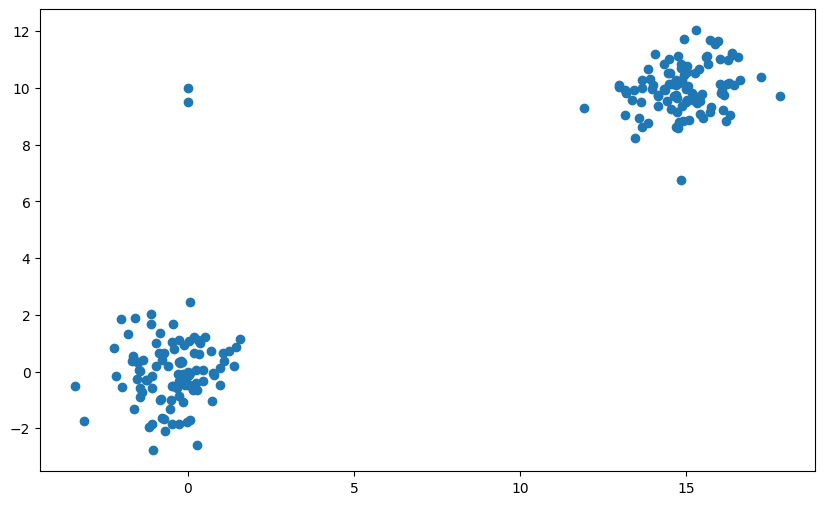

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
ax.scatter(df.Var1,df.Var2)

¿Cómo detectar estos puntos? La idea es que hay que tener una idea de punto "demasiado" alejado del resto, para eso utilizaremos
la llamada [distancia de Mahalanobis](https://www.statisticshowto.com/mahalanobis-distance/) que tiene la distancia de un punto a un conjunto de puntos. Esto se hace mediante "envolturas elípticas"

In [ ]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.1).fit(df)  # la contaminación es la proporción de outliers, la decidimos nosotros
ee # una "envoltura"

EllipticEnvelope()

In [ ]:
p = ee.predict(df)
p # +1 normal, -1 outlier

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1])

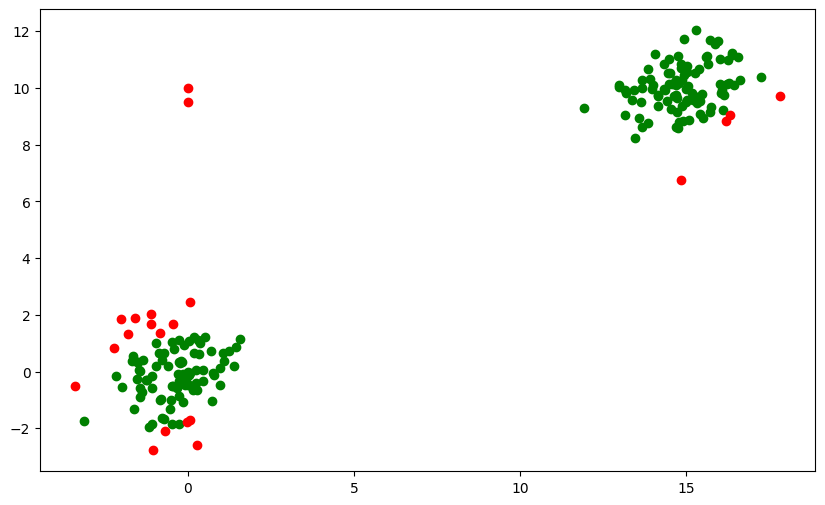

In [ ]:
filtro = p==+1
normales = df[filtro]
outliers = df[~filtro]
fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
ax.scatter(normales.Var1,normales.Var2,color="green")
ax.scatter(outliers.Var1,outliers.Var2,color="red")


En el ejemplo de la f1:

In [ ]:
df = df_pilotos.dropna()
ee = EllipticEnvelope(contamination=.01).fit(df)
p = ee.predict(df)
p

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
filtro = p==+1
normales = df[filtro]
outliers = df[~filtro]

outliers

Driver,ALO,PER,RUS,VER
LapNumber,,,,
2,95.567,80.0,96.114,97.68


Un aviso: No funciona bien si las funciones no siguen una normal ni aproximadamente

<a name="Bibliografía"></a>
## Bibliografía

[Notebook](https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/boxplot/Box_plot_interpretation.ipynb) con ejemplos de Boxplot incluyendo variantes como el "notch"

*Data Cleaning*. Ihab F. Ilyas and Xu Chu. Association for Computing Machinery 9781450371544 Tiene un capítulo dedicado a outliers muy completo


[Best Practices in Data Cleaning: A Complete Guide to Everything You Need to Do Before and After Collecting Your Data](http://pzs.dstu.dp.ua/DataMining/preprocessing/bibl/cleaning.pdf). Capítulo 7.
de Jason W. Osborne. Un poco técnico/estadístico pero muy preciso,

[Outliers multivariante](https://medium.com/analytics-vidhya/anomaly-detection-in-python-part-1-basics-code-and-standard-algorithms-37d022cdbcff) Artículo de donde he tomado el código y el ejemplo para este apartado